# Following Yosef Meller Ph.D. work

In [3]:
"""
Created on Wed Jun 29 14:19:49 2016

@author: yosef meller
"""
import numpy as np, matplotlib.pyplot as pl
from flowtracks.graphics import pdf_bins, generalized_histogram_disp
from itertools import cycle

def joint_pdf(val1, val2, log=False, cmap=None, **kwds):
    """
    Generate a contour-map showing the joint-pdf of two forces f1 and f2.
    Underlying the map is a color-map of average coloring value for each bin.
    
    Arguments:
    val1, val2 - equal-length arrays with the data for the contour axes x 
        and y respectively.
    log - plot the log10 of the histogram rather than the raw histogram.
    cmap - if a matplotlib colormap, show a color map instead of a contour map.
        default is None (contour map).
    kwds - passed on to MAtplotlib underlying function.
    """
    num_bins = 100
    hist, xedges, yedges = np.histogram2d(val1, val2, bins=num_bins,
        normed=True)
    
    if log:
        hist = np.log10(hist)
    
    xs = np.mean([xedges[:-1], xedges[1:]], axis=0)
    ys = np.mean([yedges[:-1], yedges[1:]], axis=0)
    
    if not cmap:
        cs = pl.contour(xs, ys, hist.T, 10, colors='k', origin='lower')
        pl.clabel(cs)
    else:
        pl.imshow(hist.T, aspect='auto', origin='lower', cmap=cmap,
            extent=(val1.min(), val1.max(), val2.min(), val2.max()), **kwds)
        pl.colorbar()

In [4]:
from flowtracks.io import Scene
particles = Scene('./test_h5/traj_GT.h5')

In [6]:
traj = list(particles.iter_trajectories())

In [83]:
vel = np.hstack([np.sum(tr.velocity()**2,axis=1) for tr in particles.iter_trajectories()])
acc = np.hstack([np.sum(tr.accel()**2,axis=1) for tr in particles.iter_trajectories()])

In [84]:
p = np.percentile(vel,[5,95])
vel = vel[np.logical_and(vel>p[0],vel<p[1])]

p = np.percentile(acc,[5,95])
acc = acc[np.logical_and(acc>p[0],acc<p[1])]

/Users/alexliberzon/opt/miniconda3/envs/flowtracks/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


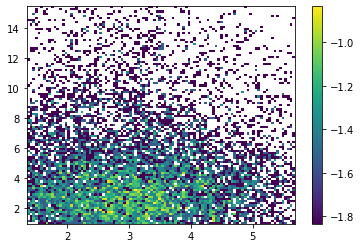

In [90]:
joint_pdf(vel,np.sqrt(acc),log=True,cmap=pl.cm.viridis);

In [106]:
from flowtracks.graphics import pdf_bins, generalized_histogram_disp
from itertools import cycle

def conditional_stats_graph(series, condition, num_bins):
    """
    Graph the means and standard deviations of a series as a function of the 
    condition.
    
    Arguments:
    series - a set of measurements, 1D array.
    condition - the corresponding value of the condition in each measurement.
    num_bins - number of bins to make for the conditional.
    """
    bin_edges = np.linspace(condition.min(), condition.max(), num_bins + 1)
    counts = np.empty(num_bins)
    means = np.empty(num_bins)
    stds = np.empty(num_bins)
    
    for hbin in range(num_bins):
        in_bin = ((condition >= bin_edges[hbin]) & (condition < bin_edges[hbin + 1]))
        bin_vals = series[in_bin]
        
        counts[hbin] = len(bin_vals)
        means[hbin] = bin_vals.mean()
        stds[hbin] = bin_vals.std()
        
    print(f"counts = {counts}, \n means = {means},\n stds = {stds}")
    
    bin_halfwidth = 0.5*(bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[:-1] + bin_halfwidth
    
    means[counts < 30] = np.nan # Not enough data
    pl.plot(bin_centers, stds)
    #pl.errorbar(means, bin_centers, xerr=stds)from mixintel.graphs import conditional_stats_graph


counts = [1.000e+00 4.000e+00 2.000e+00 1.000e+00 2.000e+00 1.500e+01 5.000e+01
 1.250e+02 3.200e+02 6.080e+02 1.103e+03 1.654e+03 2.417e+03 2.504e+03
 1.978e+03 1.008e+03 2.550e+02 4.200e+01 9.000e+00 1.000e+00], 
 means = [-3.64168510e+01  1.61762094e+00 -1.14773693e+01 -1.09057961e+01
 -1.01099415e+01 -1.37751603e+00 -4.22043353e-01  6.02771461e-01
  1.18357658e-01  1.01281531e-01  3.59589905e-02  5.92937246e-02
  8.41671526e-02  1.71305358e-01  1.69089049e-01  8.40808898e-02
  5.40715098e-01  9.62188005e-01  1.14731693e+00 -1.53541565e+01],
 stds = [ 0.         16.20076752  0.24692822  0.          0.03278351  4.88603306
  7.6980958   6.98078775  5.86935616  5.49453688  5.26270294  4.93274212
  4.41483736  4.13581991  3.75028753  3.19662118  5.13510227  4.71459532
  4.93124628  0.        ]
counts = [   6.    3.   10.   43.   93.  294.  762. 1369. 1513. 1744. 1783. 1474.
 1132.  739.  567.  301.  186.   48.   13.   19.], 
 means = [25.85556984  0.66499239 11.31500721  4.42447424  2.2

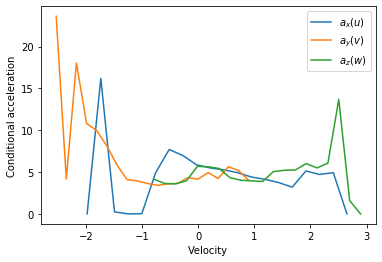

In [112]:
# or using some helper functions:
# .collect 
acc, vel = particles.collect(['accel', 'velocity'])    
num_bins = 20   

conditional_stats_graph(acc[:,0], vel[:,0], num_bins);
conditional_stats_graph(acc[:,1], vel[:,1], num_bins);
conditional_stats_graph(acc[:,2], vel[:,2], num_bins);

pl.legend(('$a_x(u)$','$a_y(v)$','$a_z(w)$'))
pl.xlabel('Velocity')
pl.ylabel('Conditional acceleration')
pl.show()